In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글폰트 지정
plt.rcParams['axes.unicode_minus']=False # 한글폰트 사용 시 -기호 깨지는 문제 해결

# df(가격 + 출하량) 정제

In [10]:
df_가격 = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\일별소매가\\품목_소매가_전부.csv', encoding = 'cp949')
df_출하량 = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\식품예측 데이터\\출하량_가락\\품목_출하량_전부.csv', encoding = 'cp949')


# df_가격 컬럼 정리
df_가격.drop(columns = ['index'], inplace = True)
df_가격 = df_가격[['구분', '품목', '평균']]

# 컬럼명 수정
df_가격 = df_가격.rename(columns={'구분':'날짜', '전통시장':'전통시장가격', '유통업체':'유통업체가격', '평균':'평균가격', '품목':'품목명'})

# 형변환
df_가격['날짜'] = pd.to_datetime(df_가격['날짜'])

df_가격['평균가격'] = df_가격['평균가격'].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

df_가격 = df_가격.sort_values(['품목명', '날짜'], ascending=True)



# 품목별 단위 가격 계산 함수
def calculate_1kg_price(row):
    if row['품목명'] == '감자':  # 100g
        return row['평균가격'] * 10
    elif row['품목명'] == '건고추':  # 600g
        return row['평균가격'] * 10 / 6
    elif row['품목명'] == '무':  # 무는 한 개에 대략 1kg
        return row['평균가격']
    elif row['품목명'] == '배추':  # 1포기
        return row['평균가격'] * 3 / 10  # 표준규격 3포기 한 망에 10kg
    elif row['품목명'] == '시금치':  # 100g
        return row['평균가격'] * 10
    elif row['품목명'] == '쌀':  # 20kg
        return row['평균가격'] / 20
    elif row['품목명'] == '애호박':  # 1개 대략 300g
        return row['평균가격'] * 10 / 3
    elif row['품목명'] == '양배추':  # 1포기
        return row['평균가격'] * 10 / 11  # 양배추 1통은 일반적으로 1100g 전후의 상품이 선별되며, 1.5kg 내외의 상품도 있습니다
    elif row['품목명'] == '오이':  # 10개
        return row['평균가격'] / 2  # 오이 한 개 무게는 대략 200g -> 5개 1kg
    elif row['품목명'] == '콩나물':  # 340g
        return row['평균가격'] * 100 / 34
    elif row['품목명'] == '새송이버섯':  # 100g
        return row['평균가격'] * 10
    elif row['품목명'] == '팽이':  # 150g
        return row['평균가격'] * 100 / 15
    else:
        return row['평균가격']  # 기본적으로 변환하지 않은 값을 반환

# '단위가격' 컬럼 생성
df_가격['단위가격'] = df_가격.apply(calculate_1kg_price, axis=1)
df_가격['단위가격'] = df_가격['단위가격'].round(1)

# df_출하량
# 컬럼명 수정
df_출하량 = df_출하량.rename(columns={'DATE':'날짜', '총반입량':'가락시장반입량'})
# 날짜 datetime형 변환
df_출하량['날짜'] = pd.to_datetime(df_출하량['날짜'].astype(str), format='%Y-%m-%d')
# 컬럼 선택
df_반입량 = df_출하량[['날짜', '가락시장반입량']]


# 가격과 출하량 합치기
df_가격_출하량_전체 = pd.merge(df_가격, df_출하량, on=['날짜', '품목명'], how='left')
print(df_가격_출하량_전체)

# 컬럼 선택
df = df_가격_출하량_전체[['날짜', '품목명', '평균가격', '단위가격', '가락시장반입량']]
df

# 그래프 그릴 때 사용할 컬럼 생성
df['년월'] = df['날짜'].dt.strftime('%Y-%m')
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month

print(df.info())

df

              날짜 품목명   평균가격    단위가격  가락시장반입량     전일     전년  서울청과    농협  중앙청과  \
0     2014-01-02  감자  202.0  2020.0      NaN    NaN    NaN   NaN   NaN   NaN   
1     2014-01-03  감자  208.0  2080.0    376.0    0.0  279.0  75.0   1.0  32.0   
2     2014-01-04  감자  208.0  2080.0    262.0  376.0  228.0  71.0  10.0   9.0   
3     2014-01-05  감자  208.0  2080.0      NaN    NaN    NaN   NaN   NaN   NaN   
4     2014-01-06  감자  281.0  2810.0    285.0    0.0    0.0  63.0   9.0  15.0   
...          ...  ..    ...     ...      ...    ...    ...   ...   ...   ...   
65115 2024-12-01  팽이  529.0  3526.7      NaN    NaN    NaN   NaN   NaN   NaN   
65116 2024-12-02  팽이  529.0  3526.7      NaN    NaN    NaN   NaN   NaN   NaN   
65117 2024-12-03  팽이  530.0  3533.3      NaN    NaN    NaN   NaN   NaN   NaN   
65118 2024-12-04  팽이  534.0  3560.0      NaN    NaN    NaN   NaN   NaN   NaN   
65119 2024-12-05  팽이  569.0  3793.3      NaN    NaN    NaN   NaN   NaN   NaN   

       동화청과   한국청과  대아청과  
0       NaN 

C:\Users\acorn\AppData\Local\Temp\ipykernel_13352\3058288903.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['년월'] = df['날짜'].dt.strftime('%Y-%m')
C:\Users\acorn\AppData\Local\Temp\ipykernel_13352\3058288903.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['년'] = df['날짜'].dt.year
C:\Users\acorn\AppData\Local\Temp\ipykernel_13352\3058288903.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,날짜,품목명,평균가격,단위가격,가락시장반입량,년월,년,월
0,2014-01-02,감자,202.0,2020.0,NaN,2014-01,2014,1
1,2014-01-03,감자,208.0,2080.0,376.0,2014-01,2014,1
2,2014-01-04,감자,208.0,2080.0,262.0,2014-01,2014,1
3,2014-01-05,감자,208.0,2080.0,NaN,2014-01,2014,1
4,2014-01-06,감자,281.0,2810.0,285.0,2014-01,2014,1
...,...,...,...,...,...,...,...,...
65115,2024-12-01,팽이,529.0,3526.7,NaN,2024-12,2024,12
65116,2024-12-02,팽이,529.0,3526.7,NaN,2024-12,2024,12
65117,2024-12-03,팽이,530.0,3533.3,NaN,2024-12,2024,12
65118,2024-12-04,팽이,534.0,3560.0,NaN,2024-12,2024,12


In [11]:
# 데이터프레임 저장
df.to_pickle("df.pkl")
df.to_csv("df.csv")

# 데이터프레임 불러오기

In [3]:
# 데이터프레임 불러오기
df = pd.read_pickle('C:\\Users\\acorn\\Downloads\\채소사는날\\df.pkl')
df
# df_csv = pd.read_csv('C:\\Users\\acorn\\Downloads\\채소사는날\\df.csv')
# df_csv

,날짜,품목명,평균가격,단위가격,가락시장반입량,년월,년,월
0,2014-01-02,감자,202.0,2020.0,NaN,2014-01,2014,1
1,2014-01-03,감자,208.0,2080.0,376.0,2014-01,2014,1
2,2014-01-04,감자,208.0,2080.0,262.0,2014-01,2014,1
3,2014-01-05,감자,208.0,2080.0,NaN,2014-01,2014,1
4,2014-01-06,감자,281.0,2810.0,285.0,2014-01,2014,1
...,...,...,...,...,...,...,...,...
65115,2024-12-01,팽이,529.0,3526.7,NaN,2024-12,2024,12
65116,2024-12-02,팽이,529.0,3526.7,NaN,2024-12,2024,12
65117,2024-12-03,팽이,530.0,3533.3,NaN,2024-12,2024,12
65118,2024-12-04,팽이,534.0,3560.0,NaN,2024-12,2024,12


# 계절별 평균가격이 최저가인 품목

In [4]:
def get_season(month):
    """
    월을 계절로 바꾸는 함수
    3,4,5월 -> 봄
    6,7,8월 -> 여름
    9,10,11월 -> 가을
    11,1,2월 -> 겨울
    """
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'


In [7]:
# '품목명'별로 '단위가격' 평균값이 최저인 월 구하기
monthly_minprice_df = (
    df.groupby(['품목명', '월'])['단위가격']
    .mean()
    .reset_index()
    .sort_values(['품목명', '단위가격']) # 오른차순 하고
    .drop_duplicates('품목명', keep='first') # 첫번째만 남기므로 가장 작은 값?
)

# 계절별로 품목 분류
monthly_minprice_df['계절'] = monthly_minprice_df['월'].apply(get_season)
seasons = monthly_minprice_df.groupby('계절')['품목명'].apply(list).to_dict()
print('\n계절별 최저가 품목\n',
      seasons)
print('\n품목명별로 단위가격 평균값이 최저인 월\n')

monthly_minprice_df.sort_values('월')


계절별 최저가 품목
 {'가을': ['깐마늘', '콩나물'], '겨울': ['고구마', '배추'], '봄': ['건고추', '당근', '무', '시금치', '애호박'], '여름': ['감자', '대파', '새송이버섯', '쌀', '양배추', '양파', '오이', '팽이']}

품목명별로 단위가격 평균값이 최저인 월



,품목명,월,단위가격,계절
24,고구마,1,4754.623529,겨울
84,배추,1,936.712059,겨울
50,당근,3,3307.821114,봄
74,무,3,1815.000000,봄
111,시금치,4,4903.181818,봄
16,건고추,5,23623.358358,봄
136,애호박,5,3779.481232,봄
173,오이,6,3457.583333,여름
198,팽이,7,3234.053372,여름
66,대파,7,2674.431085,여름


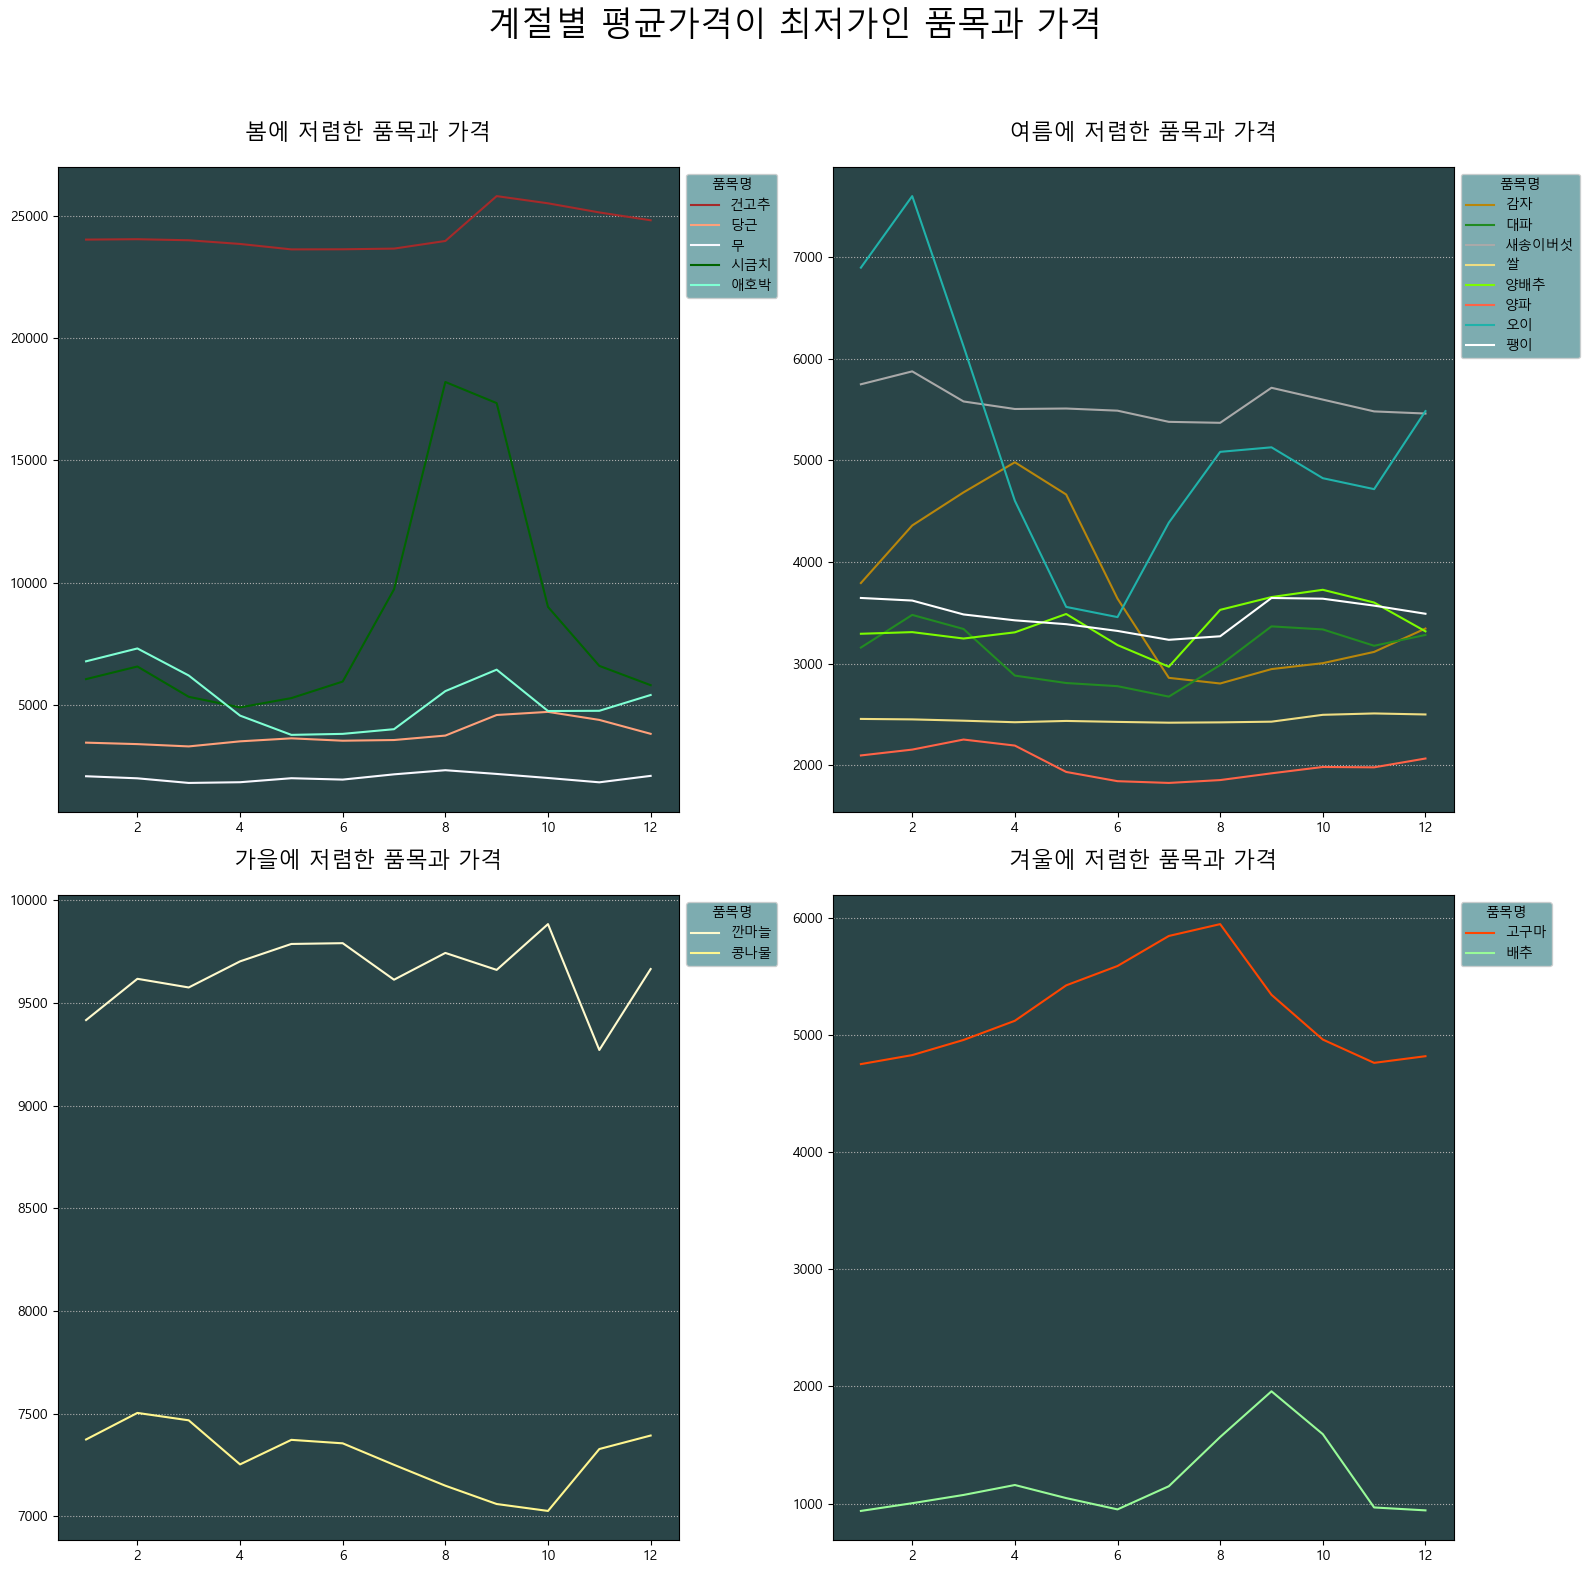

In [6]:
# 품목명과 색상을 매핑하는 딕셔너리 생성
color_mapping = {
    '감자': '#b8860b',        # 감자의 금빛 갈색
    '건고추': '#a52a2a',      # 건고추의 깊은 적갈색
    '고구마': '#ff4500',      # 고구마의 선명한 주황색
    '깐마늘': '#fffacd',      # 마늘 속살의 연노란색
    '당근': '#ffa07a',        # 당근의 연한 주황색
    '대파': '#228b22',        # 대파의 짙은 녹색
    '무': '#f8f8ff',          # 무의 깨끗한 흰색
    '배추': '#98fb98',        # 배추의 옅은 연녹색
    '새송이버섯': '#a9a9a9',  # 새송이버섯의 중간 회색
    '시금치': '#006400',      # 시금치의 짙은 녹색
    '쌀': '#eedd82',          # 쌀의 밝은 금빛 베이지색
    '애호박': '#7fffd4',      # 애호박의 밝은 청록색
    '양배추': '#7cfc00',      # 양배추의 선명한 연두색
    '양파': '#ff6347',        # 양파의 붉은 황색
    '오이': '#20b2aa',        # 오이의 선명한 청록색
    '콩나물': '#fff68f',      # 콩나물의 부드러운 노란색
    '팽이': '#ffffff'         # 팽이버섯의 순백색
}

# '품목명'별로 '단위가격' 평균값이 최저인 월 구하기
monthly_minprice_df = (
    df.groupby(['품목명', '월'])['단위가격']
    .mean()
    .reset_index()
    .sort_values(['품목명', '단위가격']) # 오른차순 하고
    .drop_duplicates('품목명', keep='first') # 첫번째만 남기므로 가장 작은 값?
)

# 계절별로 품목 분류
monthly_minprice_df['계절'] = monthly_minprice_df['월'].apply(get_season)
seasons = monthly_minprice_df.groupby('계절')['품목명'].apply(list).to_dict()


# 그래프 생성
fig = plt.figure(figsize=(16, 16))

# 계절별 그래프 위치 설정
subplot_positions = {
    '봄': 221,
    '여름': 222,
    '가을': 223,
    '겨울': 224
}

# 각 계절별 품목의 월별 평균 단위가격 추이 플롯
for season, pos in subplot_positions.items():
    ax = plt.subplot(pos)  # Subplot 객체 생성
    ax.set_facecolor('#2a4548')  # 서브플롯의 배경색 설정
    
    if season in seasons:
        for item in seasons[season]:
            x = df[df['품목명'] == item].groupby('월').agg(평균=('단위가격', 'mean')).index
            y = df[df['품목명'] == item].groupby('월').agg(평균=('단위가격', 'mean'))['평균']
            
            # 해당 품목의 색상 추출
            item_color = color_mapping.get(item, '#000000')  # 기본값은 검정색
            
            # 품목별 라인 플롯
            plt.plot(x, y, color=item_color, label=item)
            plt.grid(axis='y', ls=':')
        
        # 범례 설정
        legend = plt.legend(title="품목명", bbox_to_anchor=(1, 1), loc='upper left')
        legend.get_frame().set_facecolor('#5c979d')  # 범례의 배경색 설정
    
    # 제목 설정
    plt.title(f'{season}에 저렴한 품목과 가격', fontsize=16, pad=20)

# 전체 그래프 제목 및 레이아웃 설정
fig.suptitle('계절별 평균가격이 최저가인 품목과 가격', size=24)
fig.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 저장 및 출력
plt.savefig('계절별 평균가격이 최저가인 품목과 가격.png', dpi=200)
plt.show()

# 월별 평균가격 편차 품목 그래프

In [8]:
def get_price_diff_rate(df, period, items):
    """
    df 데이터프레임을 period(년 or 월)별 평균 냈을 때 item(품목)별로 가격 편차를 구하기
    Parameters:
    - df : DataFrame
    - period : 그룹화할 기간 (예: '년', '월', '분기' 등)
    - items : 품목명 리스트

    Returns:
    - DataFrame : 품목명과 가격편차가 포함된 데이터프레임
    """
    data = []
    for item in items:
        # 품목별 데이터 필터링
        filtered_df = df[df['품목명'] == item]

        # 기간별 평균 단위가격 계산
        grouped = filtered_df.groupby(period).agg(평균=('단위가격', 'mean'))

        # 최소, 최대, 전체 평균 계산
        monthly_min = grouped['평균'].min()
        monthly_max = grouped['평균'].max()
        all_mean = filtered_df['단위가격'].mean()

        # 가격 편차율 계산
        price_diff_rate = (monthly_max - monthly_min) / all_mean if all_mean != 0 else 0

        # 결과 저장
        data.append({'품목명': item, '가격편차': price_diff_rate})

    # 결과를 데이터프레임으로 반환
    return pd.DataFrame(data)


In [16]:
# 월별 평균가격 편차 구하기
df_monthly_price_diff_rate = get_price_diff_rate(df, '월', list(df['품목명'].unique()))

# 정렬 및 정리
df_monthly_price_diff_rate.sort_values('가격편차', ascending=False, inplace=True)

print('\n월별 평균가격 편차 품목 내림차순\n') 
df_monthly_price_diff_rate


월별 평균가격 편차 품목 내림차순



,품목명,가격편차
9,시금치,1.577224
7,배추,0.853119
14,오이,0.805975
11,애호박,0.669771
0,감자,0.591697
4,당근,0.370704
5,대파,0.259481
6,무,0.256222
2,고구마,0.229772
12,양배추,0.223822


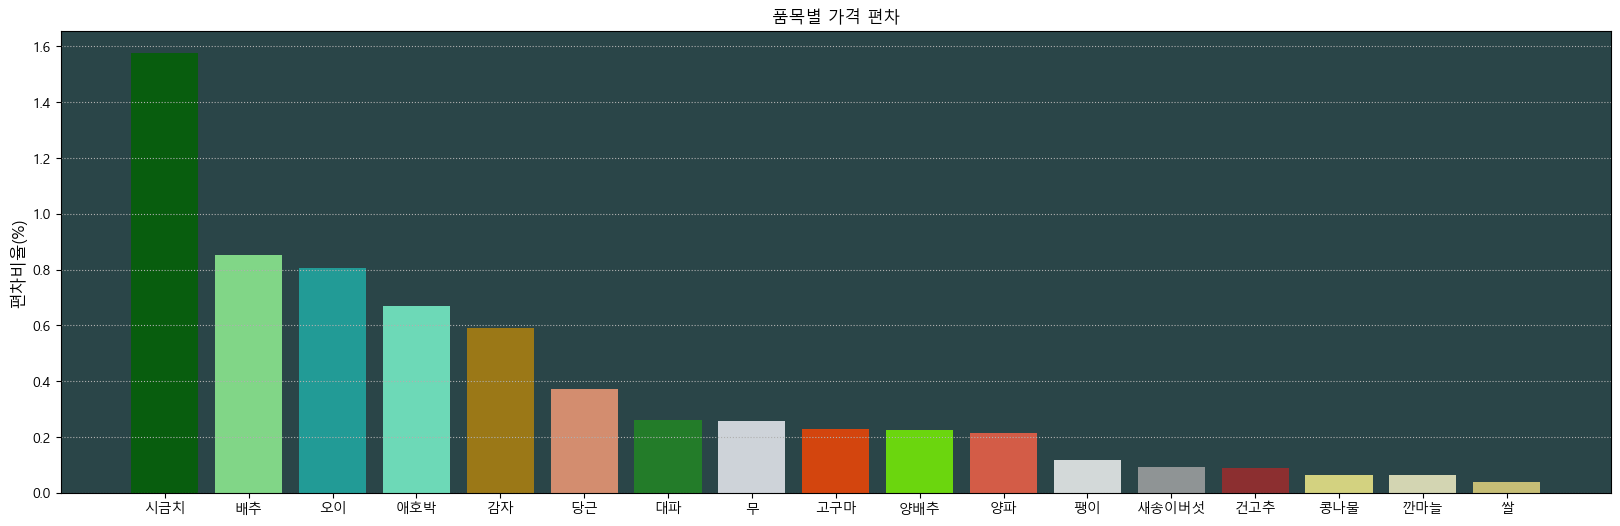

In [26]:
# 품목명과 색상을 매핑하는 딕셔너리 생성
color_mapping = {
    '감자': '#b8860b',        # 감자의 금빛 갈색
    '건고추': '#a52a2a',      # 건고추의 깊은 적갈색
    '고구마': '#ff4500',      # 고구마의 선명한 주황색
    '깐마늘': '#fffacd',      # 마늘 속살의 연노란색
    '당근': '#ffa07a',        # 당근의 연한 주황색
    '대파': '#228b22',        # 대파의 짙은 녹색
    '무': '#f8f8ff',          # 무의 깨끗한 흰색
    '배추': '#98fb98',        # 배추의 옅은 연녹색
    '새송이버섯': '#a9a9a9',  # 새송이버섯의 중간 회색
    '시금치': '#006400',      # 시금치의 짙은 녹색
    '쌀': '#eedd82',          # 쌀의 밝은 금빛 베이지색
    '애호박': '#7fffd4',      # 애호박의 밝은 청록색
    '양배추': '#7cfc00',      # 양배추의 선명한 연두색
    '양파': '#ff6347',        # 양파의 붉은 황색
    '오이': '#20b2aa',        # 오이의 선명한 청록색
    '콩나물': '#fff68f',      # 콩나물의 부드러운 노란색
    '팽이': '#ffffff'         # 팽이버섯의 순백색
}


fig = plt.figure(figsize=(20, 6))


x0 = df_monthly_price_diff_rate['품목명']
y0 = df_monthly_price_diff_rate['가격편차']
x0_colors = [color_mapping[item] for item in x0]  # x0에 해당하는 품목명별 색상 생성
plt.bar(x0, y0, color=x0_colors, alpha=0.8)

plt.gca().set_facecolor('#2a4548')
plt.yticks(np.arange(0, 1.8, step=0.2))
plt.grid(axis='y', ls=':')
plt.ylabel('편차비율(%)', fontsize=12)
plt.title('품목별 가격 편차')
plt.savefig('품목별 가격 편차.png', dpi=200)
plt.show()

# 월별 가락시장반입량(출하량) 편차 품목 그래프

In [22]:
def get_qty_diff_rate(df, period, items):
    """
    df 데이터프레임을 period(년 or 월)별 평균 냈을 때 item(품목)별로 가격 편차를 구하기
    Parameters:
    - df : DataFrame
    - period : 그룹화할 기간 (예: '년', '월', '분기' 등)
    - items : 품목명 리스트

    Returns:
    - DataFrame : 품목명과 가격편차가 포함된 데이터프레임
    """
    data = []
    for item in items:
        # 품목별 데이터 필터링
        filtered_df = df[df['품목명'] == item]

        # 기간별 평균 단위가격 계산
        grouped = filtered_df.groupby(period).agg(평균=('가락시장반입량', 'mean'))

        # 최소, 최대, 전체 평균 계산
        monthly_min = grouped['평균'].min()
        monthly_max = grouped['평균'].max()
        all_mean = filtered_df['가락시장반입량'].mean()

        # 가격 편차율 계산
        qty_diff_rate = (monthly_max - monthly_min) / all_mean if all_mean != 0 else 0

        # 결과 저장
        data.append({'품목명': item, '가락시장반입량': qty_diff_rate})

    # 결과를 데이터프레임으로 반환
    return pd.DataFrame(data)


In [23]:
# 월별 평균가격 편차 구하기
df_monthly_qty_diff_rate = get_qty_diff_rate(df, '년', list(df['품목명'].unique()))

# 정렬 및 정리
df_monthly_qty_diff_rate.sort_values('가락시장반입량', ascending=False, inplace=True)

print('\n월별 가락시장반입량 편차 품목 내림차순\n') 
df_monthly_qty_diff_rate


월별 가락시장반입량 편차 품목 내림차순



,품목명,가락시장반입량
1,건고추,2.854669
9,시금치,0.491925
7,배추,0.374630
2,고구마,0.332188
13,양파,0.235107
4,당근,0.214974
12,양배추,0.203539
6,무,0.173219
0,감자,0.159094
14,오이,0.131902


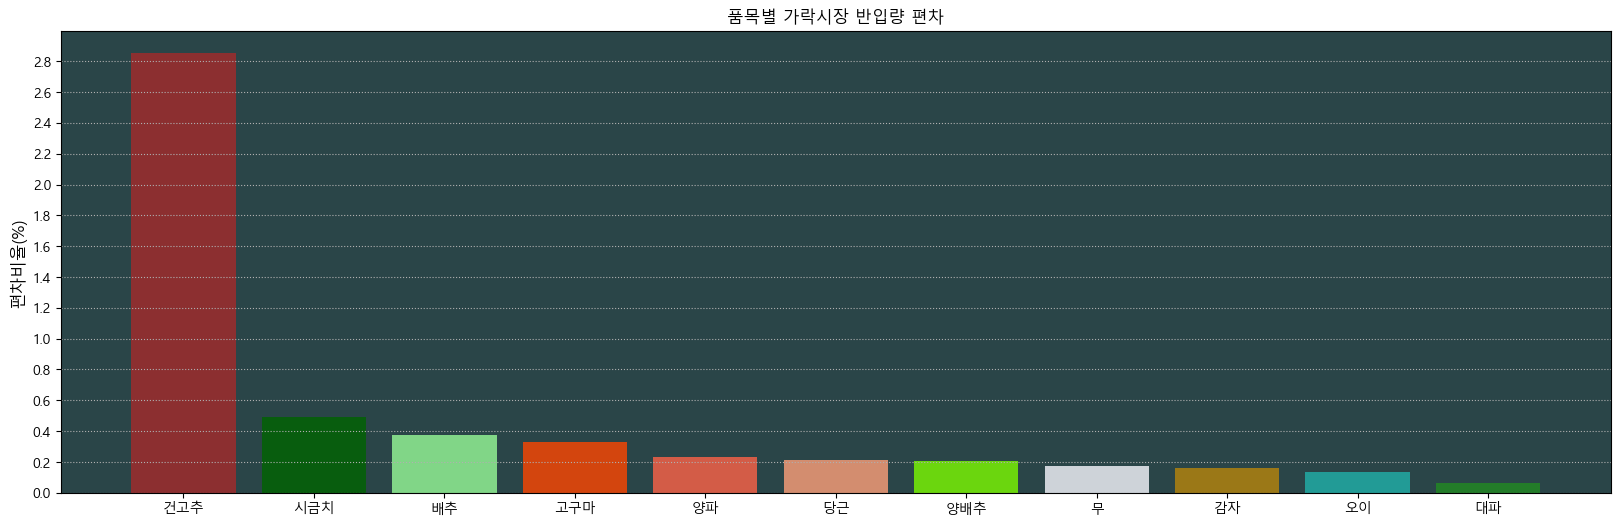

In [27]:
# 품목명과 색상을 매핑하는 딕셔너리 생성
color_mapping = {
    '감자': '#b8860b',        # 감자의 금빛 갈색
    '건고추': '#a52a2a',      # 건고추의 깊은 적갈색
    '고구마': '#ff4500',      # 고구마의 선명한 주황색
    '깐마늘': '#fffacd',      # 마늘 속살의 연노란색
    '당근': '#ffa07a',        # 당근의 연한 주황색
    '대파': '#228b22',        # 대파의 짙은 녹색
    '무': '#f8f8ff',          # 무의 깨끗한 흰색
    '배추': '#98fb98',        # 배추의 옅은 연녹색
    '새송이버섯': '#a9a9a9',  # 새송이버섯의 중간 회색
    '시금치': '#006400',      # 시금치의 짙은 녹색
    '쌀': '#eedd82',          # 쌀의 밝은 금빛 베이지색
    '애호박': '#7fffd4',      # 애호박의 밝은 청록색
    '양배추': '#7cfc00',      # 양배추의 선명한 연두색
    '양파': '#ff6347',        # 양파의 붉은 황색
    '오이': '#20b2aa',        # 오이의 선명한 청록색
    '콩나물': '#fff68f',      # 콩나물의 부드러운 노란색
    '팽이': '#ffffff'         # 팽이버섯의 순백색
}


fig = plt.figure(figsize=(20, 6))


x0 = df_monthly_qty_diff_rate['품목명']
y0 = df_monthly_qty_diff_rate['가락시장반입량']
x0_colors = [color_mapping[item] for item in x0]  # x0에 해당하는 품목명별 색상 생성
plt.bar(x0, y0, color=x0_colors, alpha=0.8)

plt.gca().set_facecolor('#2a4548')
plt.yticks(np.arange(0, 3, step=0.2))
plt.grid(axis='y', ls=':')
plt.ylabel('편차비율(%)', fontsize=12)
plt.title('품목별 가락시장 반입량 편차')
plt.savefig('품목별 가락시장 반입량 편차.png', dpi=200)
plt.show()